# Assignment 2

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
path = '/home/emile/git/ecse415/A2/'

## 1. Harris Corner Detection

### Checkerboard Image

#### Derivatives

(Text(0.5, 1.0, 'I_y'), ([], []), ([], []))

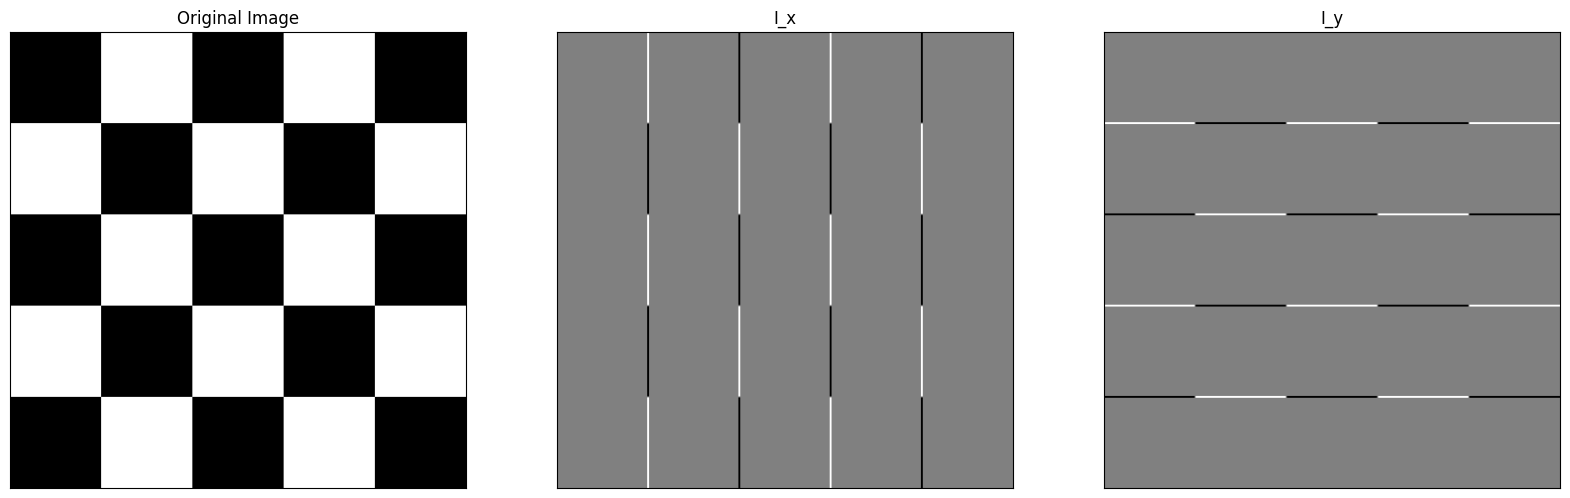

In [2]:
chk_img = cv2.imread(path+"Data/Q1/checkerboard.png")
# crh_img = cv2.imread(path+"Data/Q1/courthouse_gray.jpg")

gray = cv2.cvtColor(chk_img, cv2.COLOR_RGB2GRAY)

I_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(20, 30))
plt.subplot(131), plt.imshow(chk_img, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_x, cmap='gray')
plt.title("I_x"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_y, cmap='gray')
plt.title("I_y"), plt.xticks([]), plt.yticks([])

#### Square of Derivatives

(Text(0.5, 1.0, 'Ix_Iy'), ([], []), ([], []))

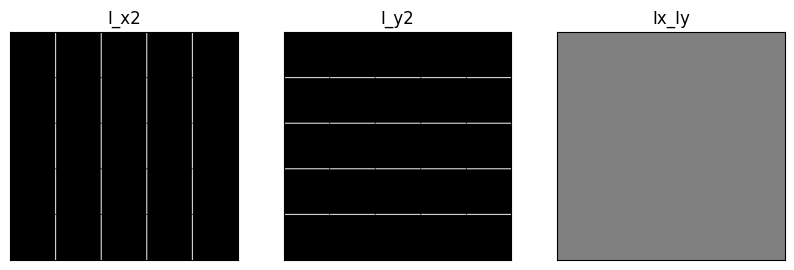

In [3]:
I_x2 = np.square(I_x)
I_y2 = np.square(I_y)
Ix_Iy = I_x * I_y

plt.figure(figsize=(10, 20))
plt.subplot(131), plt.imshow(I_x2, cmap='gray')
plt.title("I_x2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_y2, cmap='gray')
plt.title("I_y2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Ix_Iy, cmap='gray')
plt.title("Ix_Iy"), plt.xticks([]), plt.yticks([])

#### Gaussian Filtering

(Text(0.5, 1.0, '5x5 Gaussian of Ix_Iy'), ([], []), ([], []))

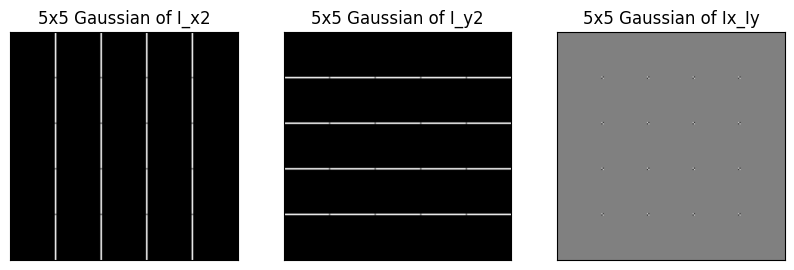

In [4]:
gauss_x = cv2.GaussianBlur(I_x2, (5,5), 0)
gauss_y = cv2.GaussianBlur(I_y2, (5,5), 0)
gauss_xy = cv2.GaussianBlur(Ix_Iy, (5,5), 0)

plt.figure(figsize=(10, 20))
plt.subplot(131), plt.imshow(gauss_x, cmap='gray')
plt.title("5x5 Gaussian of I_x2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gauss_y, cmap='gray')
plt.title("5x5 Gaussian of I_y2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gauss_xy, cmap='gray')
plt.title("5x5 Gaussian of Ix_Iy"), plt.xticks([]), plt.yticks([])

#### Cornerness function response

(Text(0.5, 1.0, 'Cornerness function response'), ([], []), ([], []))

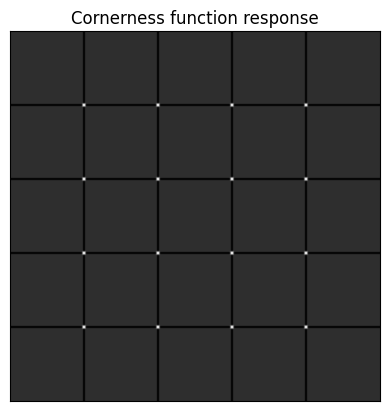

In [5]:
harr = gauss_x * gauss_y - np.square(gauss_xy) - 0.05 * np.square(gauss_x + gauss_y)

plt.imshow(harr, cmap='gray')
plt.title("Cornerness function response"), plt.xticks([]), plt.yticks([])

#### Non-maxima suppression

In [6]:
# it was found that the non_max_suppression function given in the tutorial was suppressing too much information 
# for the building image
# we instead loop through the pixels, and keep the local maxima based on a given neighbourhood_size
def non_max_suppression(harr, neighbourhood_size):
    M, N = harr.shape
    Z = np.zeros_like(harr)

    for x in range(M):
        for y in range(N):
            val = harr[x,y]
            if val > 0:
                deleted = False
                for dx in range(-neighbourhood_size, neighbourhood_size):
                    for dy in range(-neighbourhood_size, neighbourhood_size):
                        real_x, real_y = x + dx, y + dy
                        if 0 <= real_x < M and 0 <= real_y < N:
                            n_val = harr[real_x, real_y]
                            if n_val > val:
                                deleted = True
                                break
                    if deleted:
                        break
                if not deleted:
                    Z[x,y] = val

    return Z

(Text(0.5, 1.0, 'Non-maxima suppresion'), ([], []), ([], []))

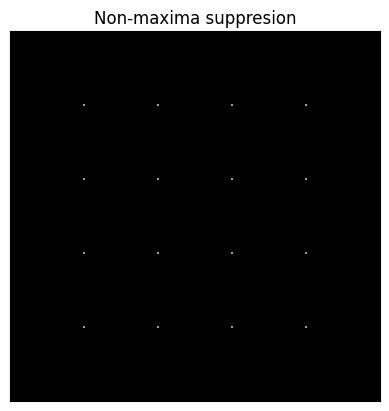

In [7]:
nms = non_max_suppression(harr, 5)

plt.imshow(nms, cmap='gray')
plt.title("Non-maxima suppresion"), plt.xticks([]), plt.yticks([])

#### Result

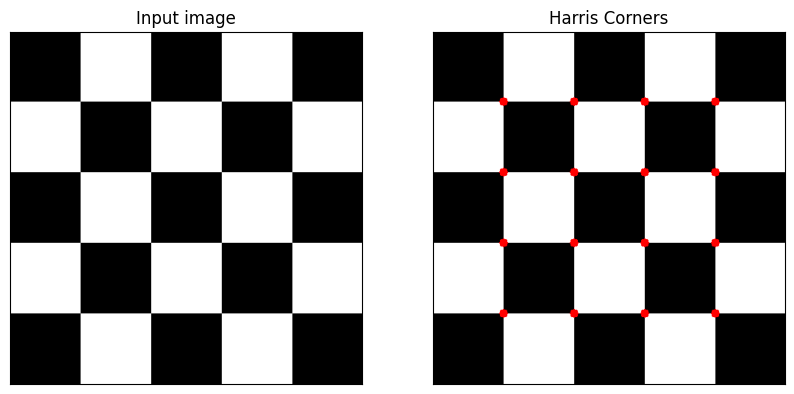

In [8]:
cv2.normalize(nms, nms, 0, 2, cv2.NORM_MINMAX)

thresh = 1.0

loc = np.where(nms >= thresh)
chk_img_cp = chk_img.copy()
for pt in zip(*loc[::-1]):
    cv2.circle(chk_img_cp, pt, 5, (255,0,0), -1)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(chk_img, cmap='gray')
plt.title("Input image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(chk_img_cp, cmap='gray')
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

### Building Image

#### Derivatives

(Text(0.5, 1.0, 'I_y'), ([], []), ([], []))

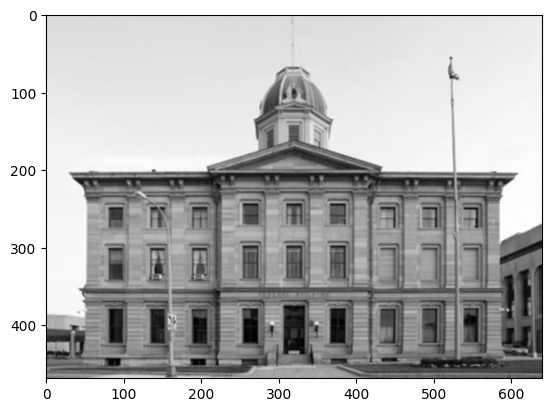

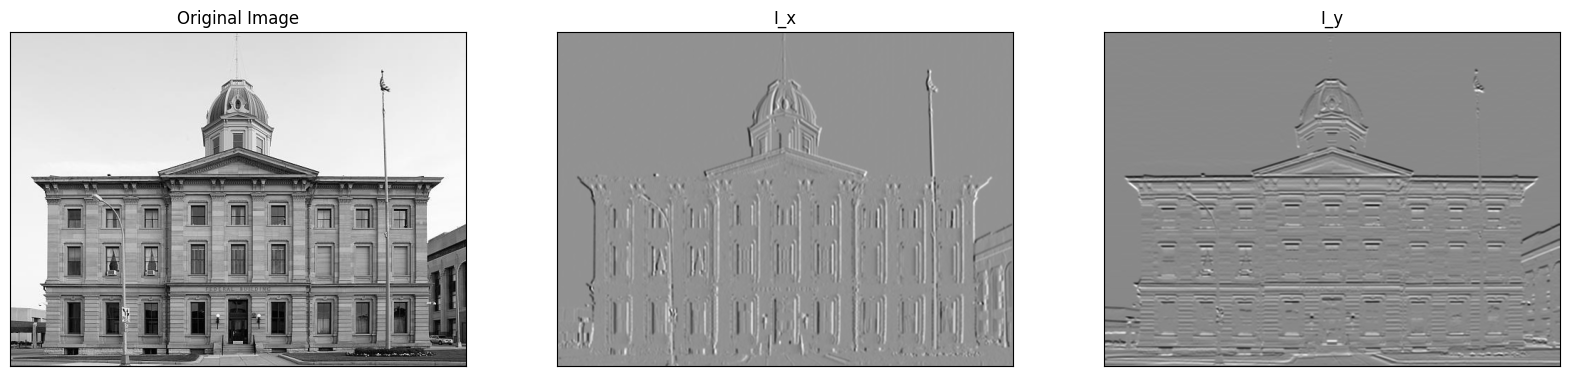

In [9]:
building_img = cv2.imread(path+"Data/Q1/courthouse_gray.jpg")

gray = cv2.cvtColor(building_img, cv2.COLOR_RGB2GRAY)
blur = cv2.blur(gray, (3,3))
plt.imshow(blur, cmap='gray')

I_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(20, 30))
plt.subplot(131), plt.imshow(building_img, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_x, cmap='gray')
plt.title("I_x"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_y, cmap='gray')
plt.title("I_y"), plt.xticks([]), plt.yticks([])

#### Square of Derivatives

(Text(0.5, 1.0, 'Ix_Iy'), ([], []), ([], []))

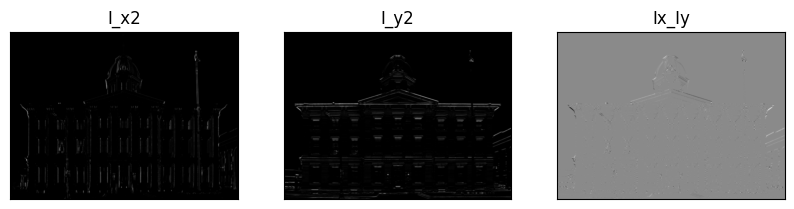

In [10]:
I_x2 = np.square(I_x)
I_y2 = np.square(I_y)
Ix_Iy = I_x * I_y

plt.figure(figsize=(10, 20))
plt.subplot(131), plt.imshow(I_x2, cmap='gray')
plt.title("I_x2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_y2, cmap='gray')
plt.title("I_y2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(Ix_Iy, cmap='gray')
plt.title("Ix_Iy"), plt.xticks([]), plt.yticks([])

#### Gaussian Filtering

(Text(0.5, 1.0, '5x5 Gaussian of Ix_Iy'), ([], []), ([], []))

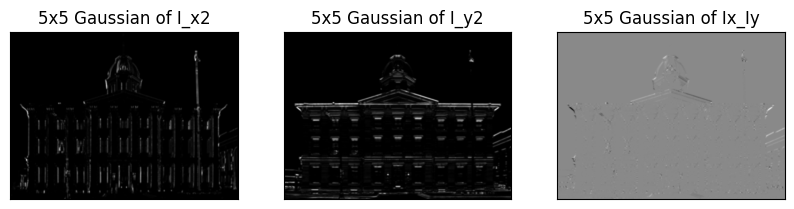

In [11]:
gauss_x = cv2.GaussianBlur(I_x2, (5,5), 0)
gauss_y = cv2.GaussianBlur(I_y2, (5,5), 0)
gauss_xy = cv2.GaussianBlur(Ix_Iy, (5,5), 0)

plt.figure(figsize=(10, 20))
plt.subplot(131), plt.imshow(gauss_x, cmap='gray')
plt.title("5x5 Gaussian of I_x2"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gauss_y, cmap='gray')
plt.title("5x5 Gaussian of I_y2"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gauss_xy, cmap='gray')
plt.title("5x5 Gaussian of Ix_Iy"), plt.xticks([]), plt.yticks([])

#### Cornerness function response

(Text(0.5, 1.0, 'Cornerness function response'), ([], []), ([], []))

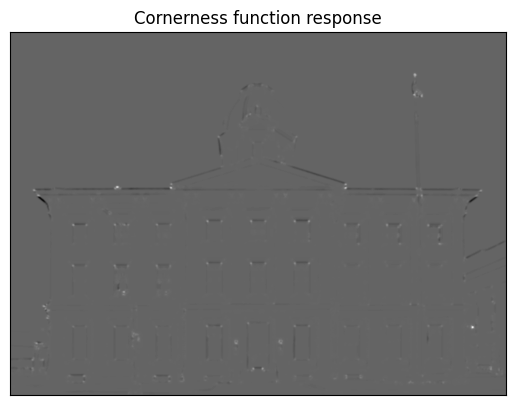

In [12]:
harr = gauss_x * gauss_y - np.square(gauss_xy) - 0.05 * np.square(gauss_x + gauss_y)

plt.imshow(harr, cmap='gray')
plt.title("Cornerness function response"), plt.xticks([]), plt.yticks([])

#### Non-maxima suppression

(Text(0.5, 1.0, 'Non-maxima suppresion'), ([], []), ([], []))

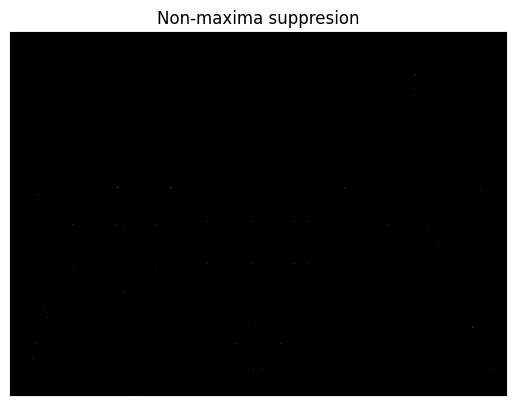

In [13]:
# mag, phs = sobel_filters(harr)
# plt.imshow(mag, cmap='gray')
nms = non_max_suppression(harr, 10)

plt.imshow(nms, cmap='gray')
plt.title("Non-maxima suppresion"), plt.xticks([]), plt.yticks([])

#### Result

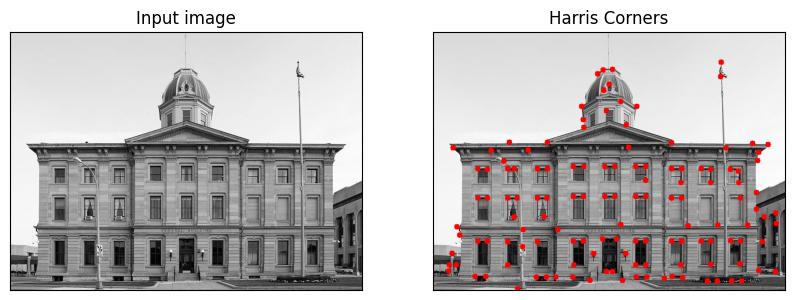

In [14]:
cv2.normalize(nms, nms, 0, 2, cv2.NORM_MINMAX)

thresh = 0.1

loc = np.where(nms >= thresh)
building_img_cp = building_img.copy()
for pt in zip(*loc[::-1]):
    cv2.circle(building_img_cp, pt, 5, (255,0,0), -1)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(building_img, cmap='gray')
plt.title("Input image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(building_img_cp, cmap='gray')
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

## 2. SIFT Features

### 2.1 SIFT in a nutshell

1. Creation of a Difference-of-Gaussian (DoG) image pyramid
   
   We start with a "Gaussian" Pyramid, where each layer is made by filtering the image with a Gaussian filter. We then create the DoG Pyramid by substracting one layer of the Gaussian pyramid from the layer below it.
   
2. Feature Detection
   
    We find the locations in (x,y,omega) where the filter outputs are maximum or minimum. We then interpolate the locations (x,y) to get the sub-pixel resolution.
   
3. Elimination of unstable keypoints

   We eliminate key points that are generated in the last step that lie along an edge, or have low contrast
   
4. Orientation of the SIFT keypoint

   Lastly, we compute the canoncial orientation of each keypoints by computing the most prominent orientation in each keypoint region
   

### 2.2 SIFT between two different pictures

In [49]:
img1 = cv2.imread(path+"image1.jpg")
img2 = cv2.imread(path+"image2.jpg")

img1_cp = img1.copy()
img2_cp = img2.copy()

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_cp = cv2.cvtColor(img1_cp, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_cp = cv2.cvtColor(img2_cp, cv2.COLOR_BGR2RGB)

(667, 500, 3)


#### 2.2.1 Compute SIFT keypoints for image1 and image2

(Text(0.5, 1.0, 'SIFT Features Image 2'), ([], []), ([], []))

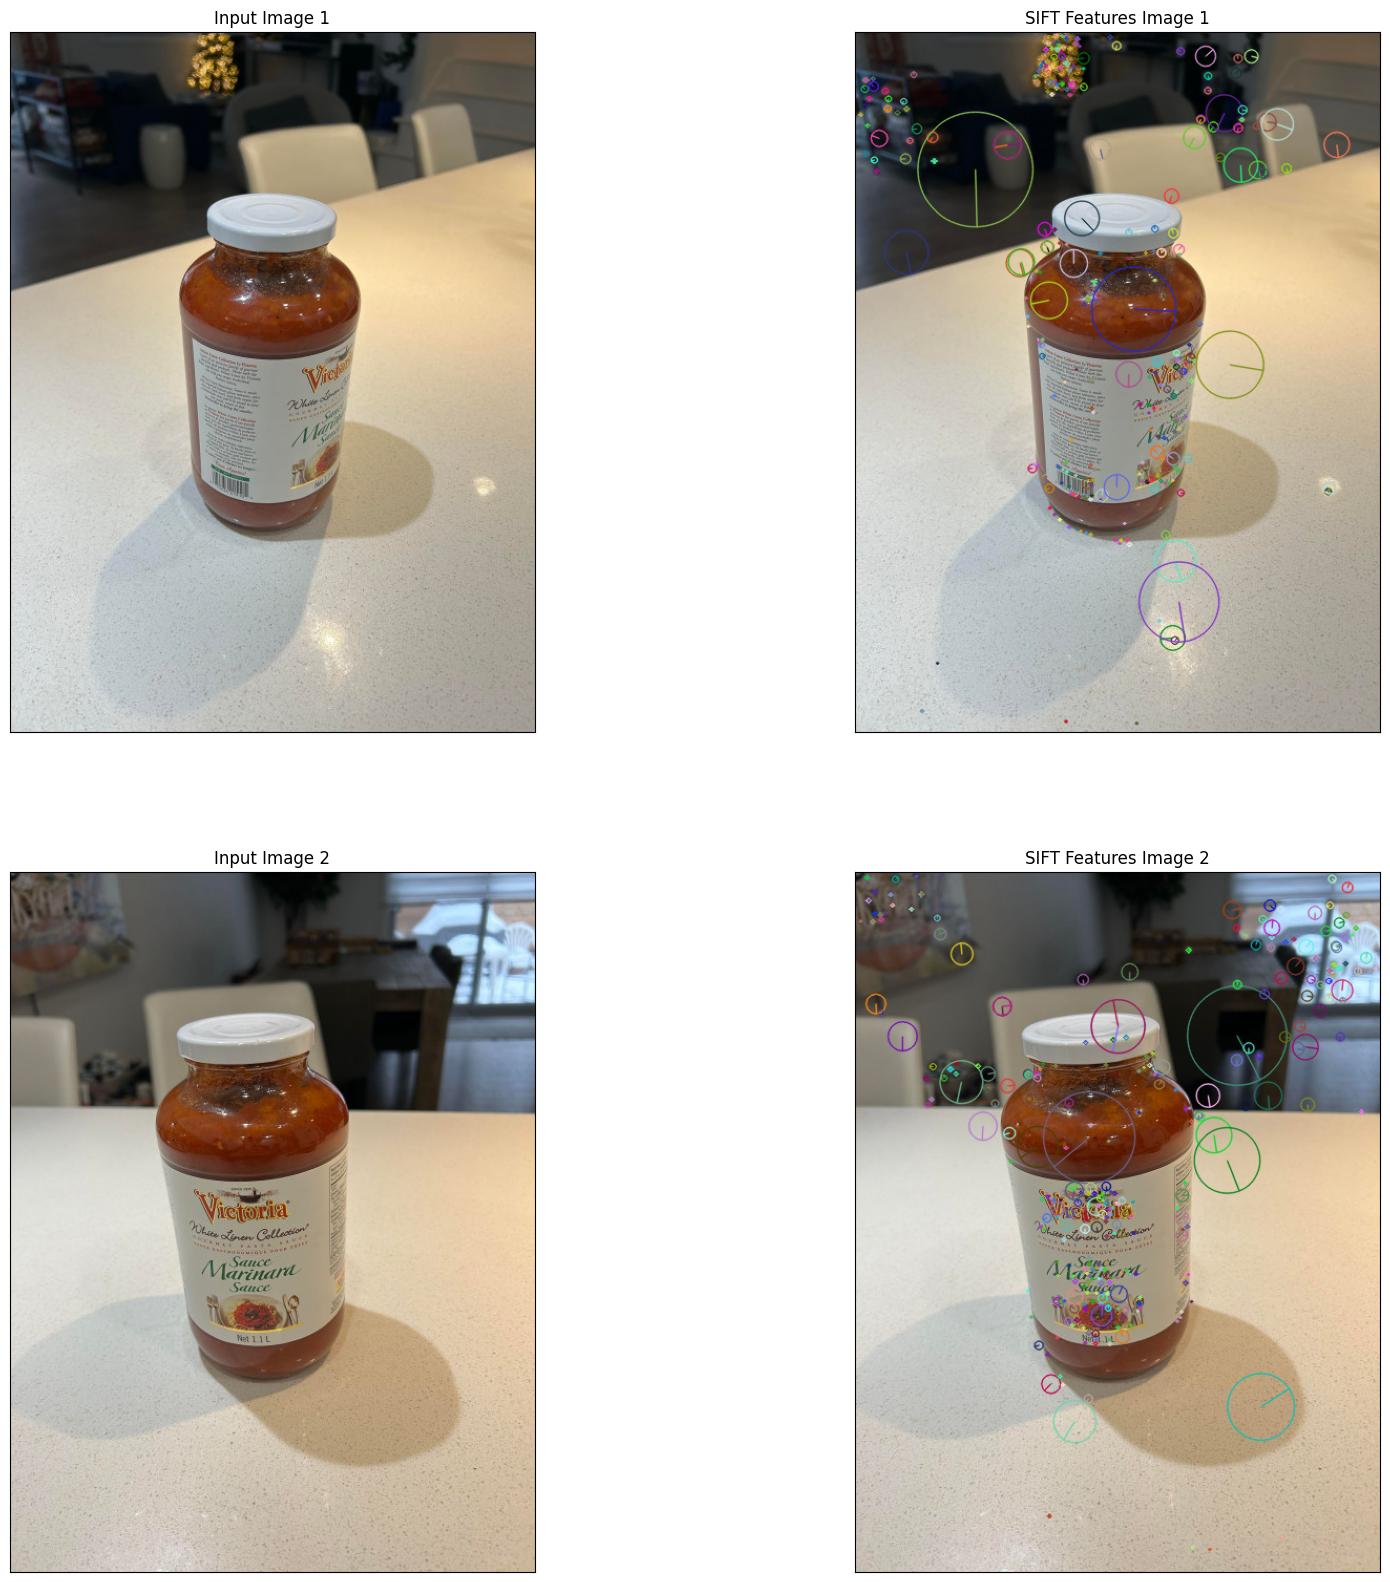

In [19]:
sift = cv2.xfeatures2d.SIFT_create()

kp1 = sift.detect(img1, None)
kp2 = sift.detect(img2, None)

cv2.drawKeypoints(img1, kp1, img1_cp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, kp2, img2_cp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(img1)
plt.title("Input Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img1_cp)
plt.title("SIFT Features Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img2)
plt.title("Input Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img2_cp)
plt.title("SIFT Features Image 2"), plt.xticks([]), plt.yticks([])

#### 2.2.2 Match all keypoints between two images using a brute-force method

In [23]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()

matches = bf.match(descriptors1, descriptors2)

#### 2.2.3 Sort matching keypoints according to matching distance

In [24]:
matches = sorted(matches, key = lambda x:x.distance)

#### 2.2.4 Display the top ten matched keypoints

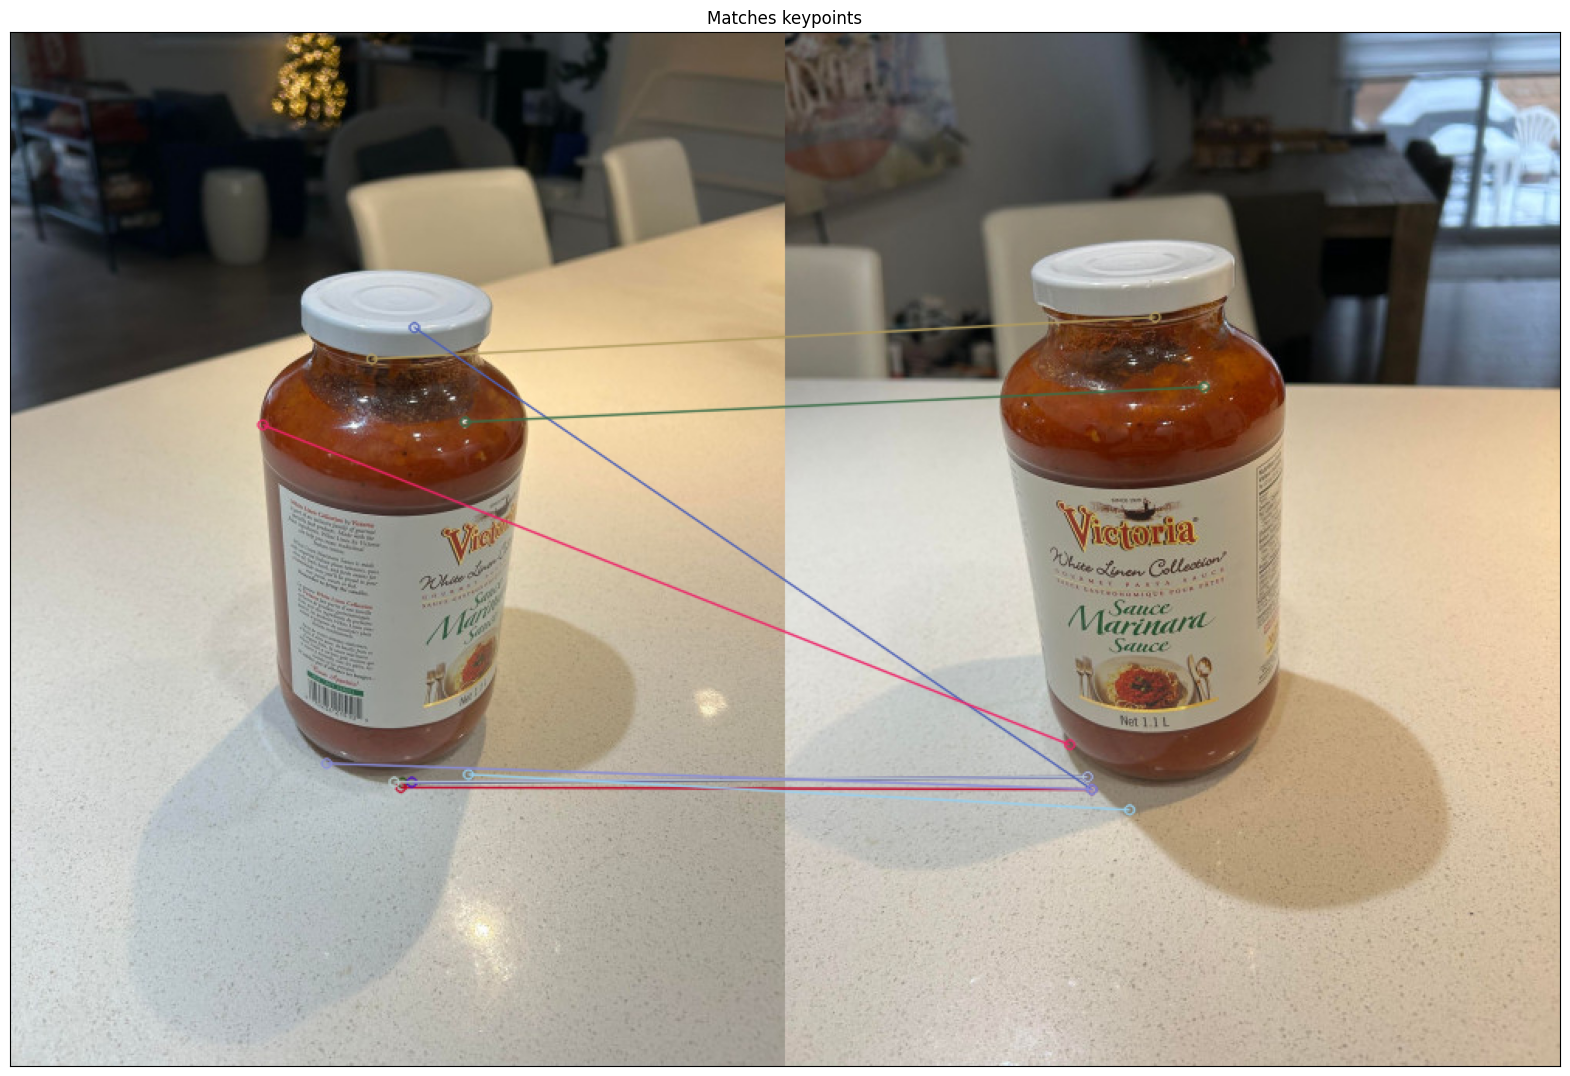

In [25]:
res = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(res)
plt.title("Matches keypoints"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2.2.5 Plot matching distance for the top 100 matched keypoints

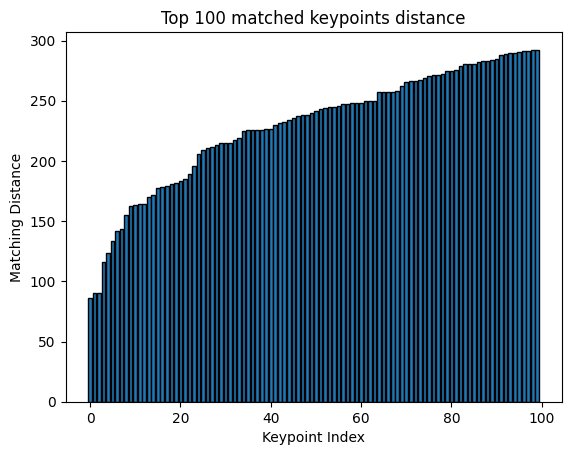

In [36]:
distances = np.zeros(100)
for i in range(100):
    distances[i] = matches[i].distance
plt.bar(np.arange(0,100), distances, edgecolor='k')
plt.title("Top 100 matched keypoints distance")
plt.xlabel("Keypoint Index"), plt.ylabel("Matching Distance")
plt.show()

### 2.3 Invariance Under Scale

#### 2.3.1 Compute SIFT keypoints of image1

(<matplotlib.image.AxesImage at 0x7fa5ff392fd0>, ([], []), ([], []))

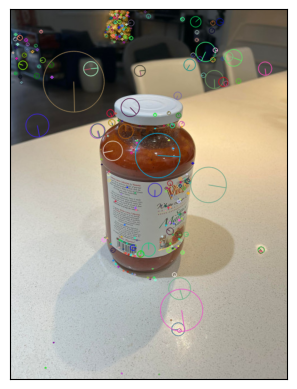

In [50]:
img1 = cv2.imread(path+"image1.jpg")

img1_cp = img1.copy()


img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_cp = cv2.cvtColor(img1_cp, cv2.COLOR_BGR2RGB)

sift = cv2.xfeatures2d.SIFT_create()

img1_cp = img1.copy()
kp = sift.detect(img1, None)


cv2.drawKeypoints(img1, kp, img1_cp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1_cp), plt.xticks([]), plt.yticks([])

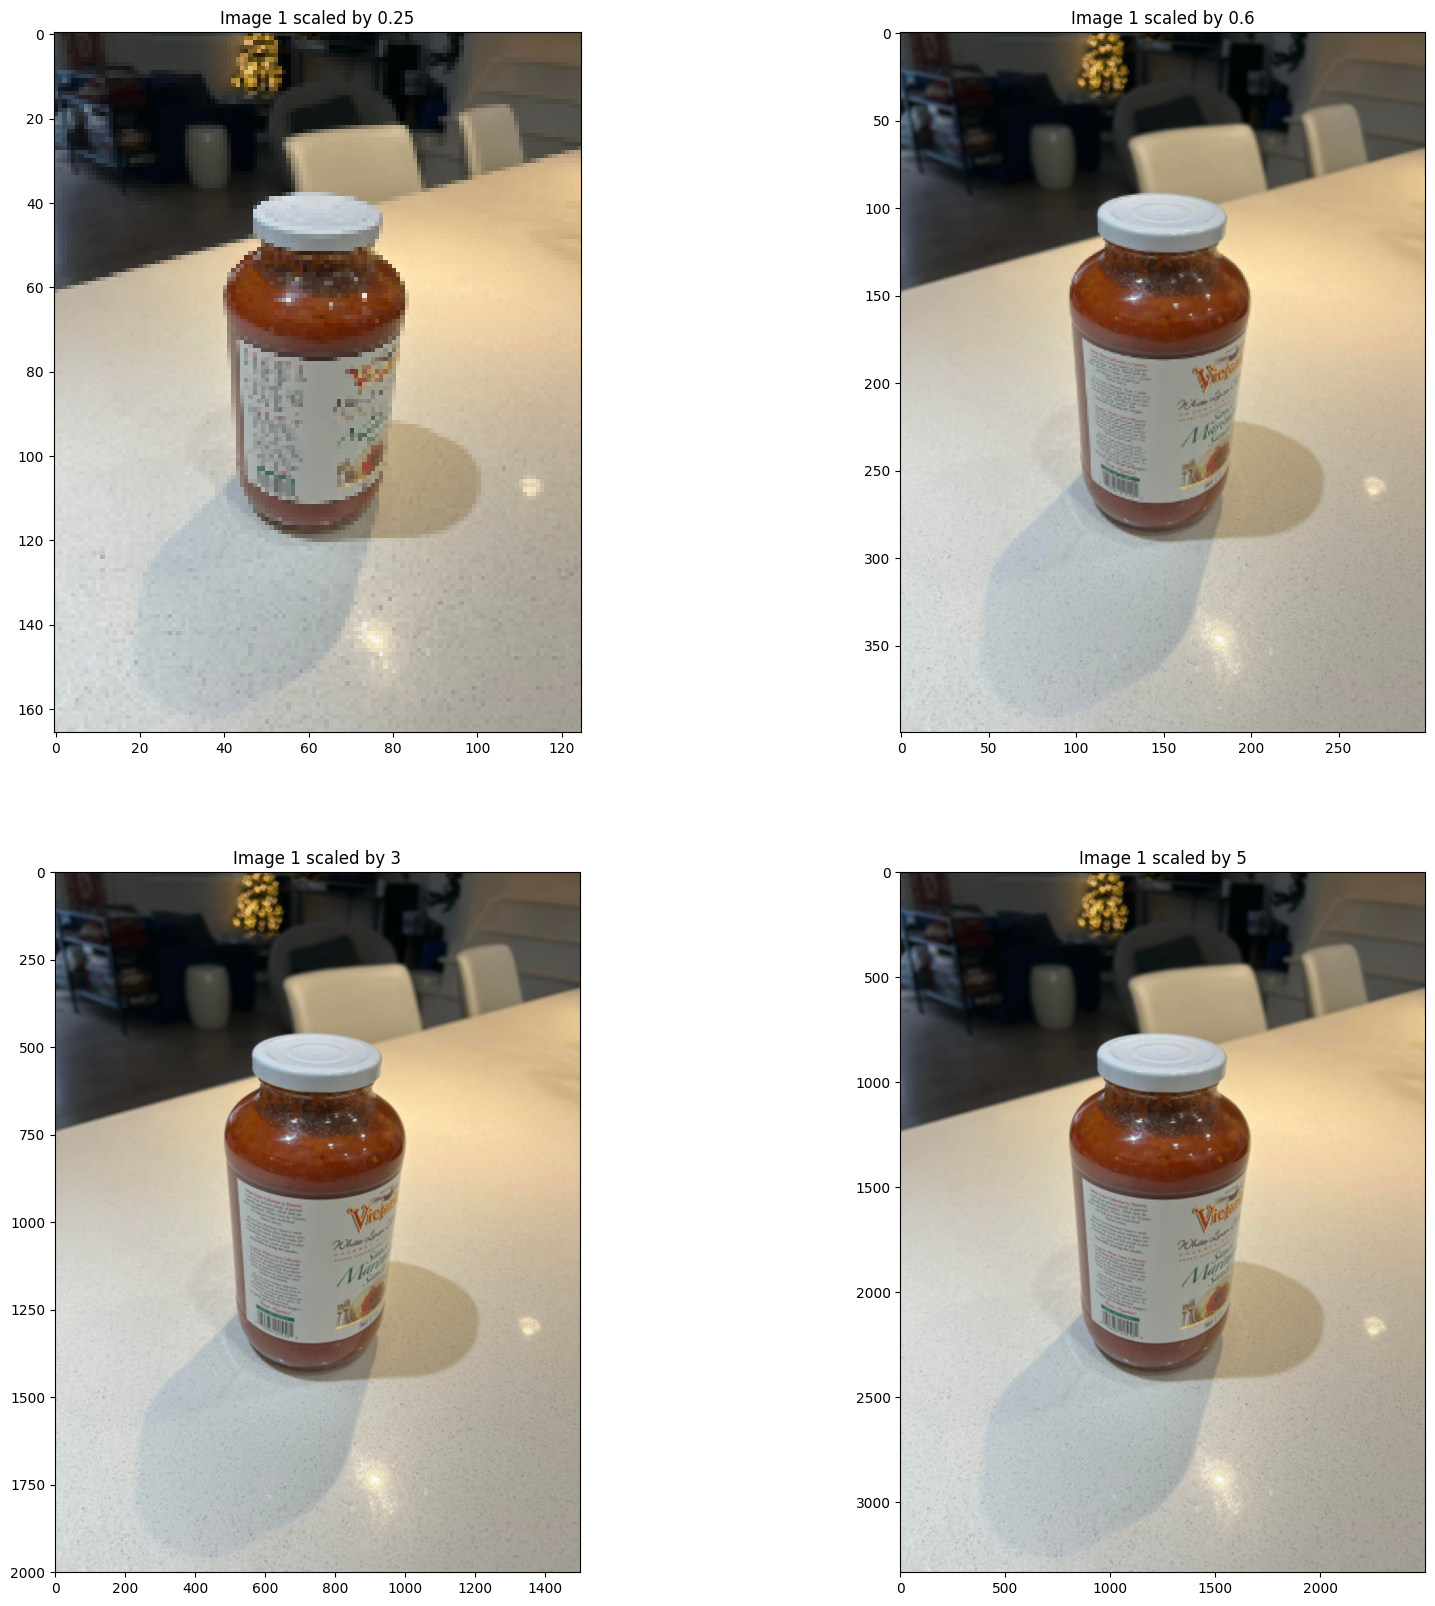

In [58]:
scaling_factors=[0.25, 0.6, 3, 5]
res_image = []
for factor in scaling_factors:
    w = int(img1.shape[1] * factor)
    h = int(img1.shape[0] * factor)
    new_dimensions = (w, h)
    res_image.append(cv2.resize(img1, new_dimensions))

plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(res_image[0]),
plt.title("Image 1 scaled by " + str(scaling_factors[0]))
plt.subplot(222), plt.imshow(res_image[1]),
plt.title("Image 1 scaled by " + str(scaling_factors[1]))
plt.subplot(223), plt.imshow(res_image[2]),
plt.title("Image 1 scaled by " + str(scaling_factors[2]))
plt.subplot(224), plt.imshow(res_image[3]),
plt.title("Image 1 scaled by " + str(scaling_factors[3]))
plt.show()
